# LC-MS pilot @FGCZ 

Analysis of the LC-MS pilot on Microvinification samples run by FGCZ in march 2024.

In [35]:
import pandas as pd
import numpy as np
import os

# Visualizations 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib.sankey import Sankey

%matplotlib inline

In [3]:
#!pip install openpyxl
#!pip install matplotlib-venn

## Load raw data

In [4]:
# set the directory 
os.chdir('/Users/lfloerl/Desktop/MICROTERROIR/Metabolomics/LC-MS/FGCZ pilot')

In [5]:
# load table 
df_neg_all = pd.read_excel('p32837_o33656_neg_features_ALL.xlsx')
df_pos_all = pd.read_excel('p32837_o33656_pos_features_ALL.xlsx')

df_pos_MS2 = pd.read_excel('p32837_o33656_pos_features_MS2.xlsx')
df_neg_MS2 = pd.read_excel('p32837_o33656_neg_features_MS2.xlsx')

In [6]:
df_neg_all.head()

,Tags,Checked,Name,Formula,Annot. Source: Predicted Compositions,Annot. Source: mzCloud Search,Annot. Source: mzVault Search,Annot. Source: ChemSpider Search,Annot. Source: MassList Search,Annot. DeltaMass [ppm],...,Adj. P-value: (Must) / (MLF),Peak Rating: 2_FS_neg_1.raw (F21),Peak Rating: 2_FS_neg_2.raw (F22),Peak Rating: 2_FS_neg_3.raw (F23),Peak Rating: 3_FS_neg_1.raw (F34),Peak Rating: 3_FS_neg_2.raw (F35),Peak Rating: 3_FS_neg_3.raw (F36),Peak Rating: 1_FS_neg_1.raw (F8),Peak Rating: 1_FS_neg_2.raw (F9),Peak Rating: 1_FS_neg_3.raw (F10)
0,NaN,False,L-Tartaric acid,C4 H6 O6,Full match,Partial match,Full match,Partial match,Full match,-0.87,...,3.069539e-05,8.9,9.2,10.0,8.9,8.9,8.9,9.6,8.9,8.9
1,NaN,False,D-Glucose,C6 H12 O6,Full match,Partial match,Full match,Partial match,Full match,-0.52,...,5.948837e-07,NaN,NaN,NaN,NaN,NaN,NaN,6.3,6.7,6.3
2,NaN,False,3-Isopropylmalic acid,C7 H12 O5,Full match,No results,Full match,Not the top hit,Full match,-0.54,...,7.274725e-13,8.9,8.5,8.1,8.9,8.5,8.5,NaN,NaN,NaN
3,NaN,False,Oxoglutaric acid; LC-tDDA; CE10,C5 H6 O5,Full match,Partial match,Full match,Partial match,Full match,-0.85,...,2.457335e-06,9.2,8.9,9.2,8.9,9.6,9.2,NaN,NaN,NaN
4,NaN,False,CITRIC ACID,C6 H8 O7,Full match,Partial match,Full match,Partial match,Full match,-0.61,...,2.457335e-06,NaN,NaN,NaN,NaN,NaN,NaN,9.2,9.6,9.2


In [7]:
print("All positive mode", df_pos_all.shape)
print("All negative mode", df_neg_all.shape)

All positive mode (5024, 86)
All negative mode (3579, 81)


## Venn Diagram of overlapping IDs 

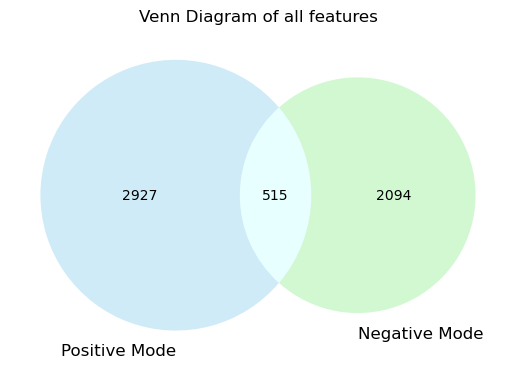

In [8]:
# Extracting sets of names
IDs_pos = set(df_pos_all['Name'])
IDs_neg = set(df_neg_all['Name'])

# Creating the Venn diagram
venn2(subsets=[IDs_pos, IDs_neg], set_labels=('Positive Mode', 'Negative Mode'),
      set_colors=('skyblue', 'lightgreen'))

# Display the plot
plt.title('Venn Diagram of all features')
plt.show()

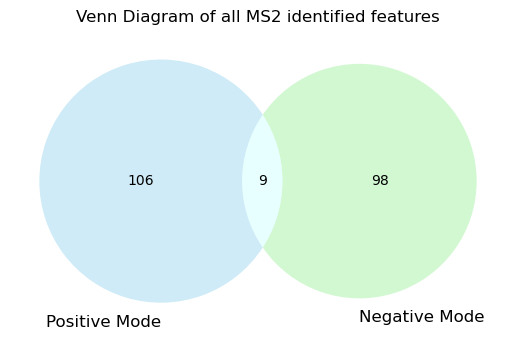

In [9]:
# Extracting sets of names
IDs_pos_MS2 = set(df_pos_MS2['Name'])
IDs_neg_MS2 = set(df_neg_MS2['Name'])

# Creating the Venn diagram
venn2(subsets=[IDs_pos_MS2, IDs_neg_MS2], set_labels=('Positive Mode', 'Negative Mode'),
      set_colors=('skyblue', 'lightgreen'))

# Display the plot
plt.title('Venn Diagram of all MS2 identified features')
plt.show()

### Heatmaps 
not sure how FGCZ created these (what transformation / normalization) because these look quite different... 

In [13]:
df_pos_all.columns

Index(['Name', 'Formula', 'Annot. Source: Predicted Compositions',
       'Annot. Source: mzCloud Search', 'Annot. Source: mzVault Search',
       'Annot. Source: ChemSpider Search', 'Annot. Source: MassList Search',
       'Annot. DeltaMass [Da]', 'Annot. DeltaMass [ppm]', 'Calc. MW', 'm/z',
       'RT [min]', 'Area (Max.)', '# ChemSpider Results', '# mzCloud Results',
       '# mzVault Results', 'mzCloud Best Match',
       'mzCloud Best Match Confidence', 'mzVault Best Match',
       'mzVault Library Match: Bamba lab 34 lipid mediators library stepped NCE 10 30 45',
       'mzVault Library Match: Bamba lab 598 polar metabolites stepped NCE 10 30 45',
       'mzVault Library Match: LipidBlast-VS68-Pos',
       'mzVault Library Match: NIST_msms_metabolites',
       'mzVault Library Match: Creation of a Plant Metabolite Spectral Library for Untargeted and targeted Metabolomics',
       'mzVault Library Match: MoNA_All_Nov2023', 'Class Coverage: d18_1',
       'Class Coverage: d18Cer', 

In [22]:
df_pos_data = df_pos_all[['Area: 2_FS_pos_1.raw (F24)', 'Area: 2_FS_pos_2.raw (F25)',
       'Area: 2_FS_pos_3.raw (F26)', 'Area: 3_FS_pos_1.raw (F37)', 'Area: 3_FS_pos_2.raw (F38)',
       'Area: 3_FS_pos_3.raw (F39)', 'Area: 1_FS_pos_1.raw (F11)', 'Area: 1_FS_pos_2.raw (F12)',
       'Area: 1_FS_pos_3.raw (F13)']]

In [26]:
df_pos_data = df_pos_data.rename(columns={
    'Area: 2_FS_pos_1.raw (F24)' : 'AF_Rep1',
    'Area: 2_FS_pos_2.raw (F25)' : 'AF_Rep2',
    'Area: 2_FS_pos_3.raw (F26)' : 'AF_Rep3',
    'Area: 3_FS_pos_1.raw (F37)' : 'MF_Rep1', 
    'Area: 3_FS_pos_2.raw (F38)' : 'MF_Rep2',
    'Area: 3_FS_pos_3.raw (F39)' : 'MF_Rep3', 
    'Area: 1_FS_pos_1.raw (F11)' : 'Must_Rep1',
    'Area: 1_FS_pos_2.raw (F12)' : 'Must_Rep2',
    'Area: 1_FS_pos_3.raw (F13)' : 'Must_Rep3'},  
    errors="raise")

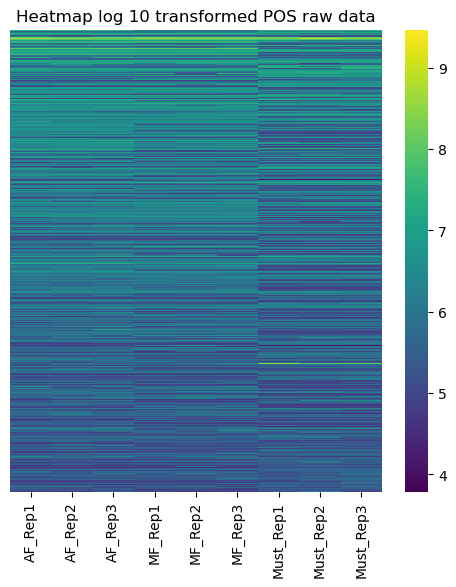

In [43]:
# Create heatmap
plt.figure(figsize=(6, 6))
ax = sns.heatmap(np.log10(df_pos_data), cmap='viridis', annot=None)
plt.title('Heatmap log 10 transformed POS raw data')

#plt.xlabel('Samples')
#plt.ylabel('Features')

# Remove y-axis tick labels
ax.set_yticklabels([])
ax.tick_params(axis='y', which='both', length=0)

plt.show()